In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
dataset = pd.read_excel(r"D:\SEMESTER 8\SEE\Project2\finaldataset.xlsx")
display(dataset)

,Project ID,Industry,Estimated Budget ($),Actual Budget Spent ($),Revenue Generated ($),Cost Overrun (%),Estimated Duration (months),Actual Duration (months),Schedule Overrun (%),Team Members,Lines of Code,Number of Features,Change Requests,Developer Turnover (%),Bug Reports,Project Success
0,P-0001,Gaming,64397,86204.73,141860.88,33.86,5,4.18,-16.48,14,392891,21,10,33.74,37,0
1,P-0002,Education,484771,451288.17,807051.64,-6.91,15,12.77,-14.90,5,357247,42,6,11.95,151,1
2,P-0003,E-commerce,228031,234091.03,0.00,2.66,17,18.39,8.20,17,220747,21,14,37.90,50,1
3,P-0004,Education,443944,487364.17,756540.01,9.78,20,20.13,0.67,4,187597,18,10,38.00,9,1
4,P-0005,Education,493733,570423.20,832131.49,15.53,21,20.22,-3.73,4,179302,49,15,15.63,119,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,P-0496,Finance,60954,88530.79,121601.62,45.24,19,16.22,-14.61,8,130592,12,4,23.74,81,0
496,P-0497,E-commerce,391383,341190.80,0.00,-12.82,4,3.41,-14.71,12,244000,5,9,16.82,171,1
497,P-0498,Finance,294761,429189.68,834548.33,45.61,12,17.59,46.60,10,265989,24,12,46.03,71,0
498,P-0499,Finance,358658,459627.40,865976.65,28.15,18,18.15,0.81,16,332137,48,3,0.60,53,0


# PRE PROCESSING

In [3]:
print("=============== DATASET INFO ===============")
dataset.info()
print("\n")
print("=============== NULL VALUES ===============")
display(dataset.isnull().sum())
print("\n")
print("=============== DATA TYPES ===============")
display(dataset.dtypes)
print("\n")
print("=============== DUPLICATES ===============")
display(dataset.duplicated().sum())

=============== DATASET INFO ===============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project ID                   500 non-null    object 
 1   Industry                     500 non-null    object 
 2   Estimated Budget ($)         500 non-null    int64  
 3   Actual Budget Spent ($)      500 non-null    float64
 4   Revenue Generated ($)        500 non-null    float64
 5   Cost Overrun (%)             500 non-null    float64
 6   Estimated Duration (months)  500 non-null    int64  
 7   Actual Duration (months)     500 non-null    float64
 8   Schedule Overrun (%)         500 non-null    float64
 9   Team Members                 500 non-null    int64  
 10  Lines of Code                500 non-null    int64  
 11  Number of Features           500 non-null    int64  
 12  Change Requests              500 

Project ID                     0
Industry                       0
Estimated Budget ($)           0
Actual Budget Spent ($)        0
Revenue Generated ($)          0
Cost Overrun (%)               0
Estimated Duration (months)    0
Actual Duration (months)       0
Schedule Overrun (%)           0
Team Members                   0
Lines of Code                  0
Number of Features             0
Change Requests                0
Developer Turnover (%)         0
Bug Reports                    0
Project Success                0
dtype: int64



=============== DATA TYPES ===============


Project ID                      object
Industry                        object
Estimated Budget ($)             int64
Actual Budget Spent ($)        float64
Revenue Generated ($)          float64
Cost Overrun (%)               float64
Estimated Duration (months)      int64
Actual Duration (months)       float64
Schedule Overrun (%)           float64
Team Members                     int64
Lines of Code                    int64
Number of Features               int64
Change Requests                  int64
Developer Turnover (%)         float64
Bug Reports                      int64
Project Success                  int64
dtype: object



=============== DUPLICATES ===============


0

## analysis 
- 500 values and there are 16 columns in the dataset , no null values
- project ID  and industry are our categorical features.
- no duplicate rows 

### handling categorical features using label encoder 

In [4]:
le = LabelEncoder()
dataset['Industry'] = le.fit_transform(dataset['Industry'])
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'E-commerce': 0, 'Education': 1, 'Finance': 2, 'Gaming': 3, 'Healthcare': 4}


In [5]:
display(dataset)

,Project ID,Industry,Estimated Budget ($),Actual Budget Spent ($),Revenue Generated ($),Cost Overrun (%),Estimated Duration (months),Actual Duration (months),Schedule Overrun (%),Team Members,Lines of Code,Number of Features,Change Requests,Developer Turnover (%),Bug Reports,Project Success
0,P-0001,3,64397,86204.73,141860.88,33.86,5,4.18,-16.48,14,392891,21,10,33.74,37,0
1,P-0002,1,484771,451288.17,807051.64,-6.91,15,12.77,-14.90,5,357247,42,6,11.95,151,1
2,P-0003,0,228031,234091.03,0.00,2.66,17,18.39,8.20,17,220747,21,14,37.90,50,1
3,P-0004,1,443944,487364.17,756540.01,9.78,20,20.13,0.67,4,187597,18,10,38.00,9,1
4,P-0005,1,493733,570423.20,832131.49,15.53,21,20.22,-3.73,4,179302,49,15,15.63,119,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,P-0496,2,60954,88530.79,121601.62,45.24,19,16.22,-14.61,8,130592,12,4,23.74,81,0
496,P-0497,0,391383,341190.80,0.00,-12.82,4,3.41,-14.71,12,244000,5,9,16.82,171,1
497,P-0498,2,294761,429189.68,834548.33,45.61,12,17.59,46.60,10,265989,24,12,46.03,71,0
498,P-0499,2,358658,459627.40,865976.65,28.15,18,18.15,0.81,16,332137,48,3,0.60,53,0


In [6]:
dataset.columns

Index(['Project ID', 'Industry', 'Estimated Budget ($)',
       'Actual Budget Spent ($)', 'Revenue Generated ($)', 'Cost Overrun (%)',
       'Estimated Duration (months)', 'Actual Duration (months)',
       'Schedule Overrun (%)', 'Team Members', 'Lines of Code',
       'Number of Features', 'Change Requests', 'Developer Turnover (%)',
       'Bug Reports', 'Project Success'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project ID                   500 non-null    object 
 1   Industry                     500 non-null    int32  
 2   Estimated Budget ($)         500 non-null    int64  
 3   Actual Budget Spent ($)      500 non-null    float64
 4   Revenue Generated ($)        500 non-null    float64
 5   Cost Overrun (%)             500 non-null    float64
 6   Estimated Duration (months)  500 non-null    int64  
 7   Actual Duration (months)     500 non-null    float64
 8   Schedule Overrun (%)         500 non-null    float64
 9   Team Members                 500 non-null    int64  
 10  Lines of Code                500 non-null    int64  
 11  Number of Features           500 non-null    int64  
 12  Change Requests              500 non-null    int64  
 13  Developer Turnover (

### analysis 
- only one categorical feature left project ID which is not a major requirement of this project since it is just a unique identifier.

# VISUALIZATIONS

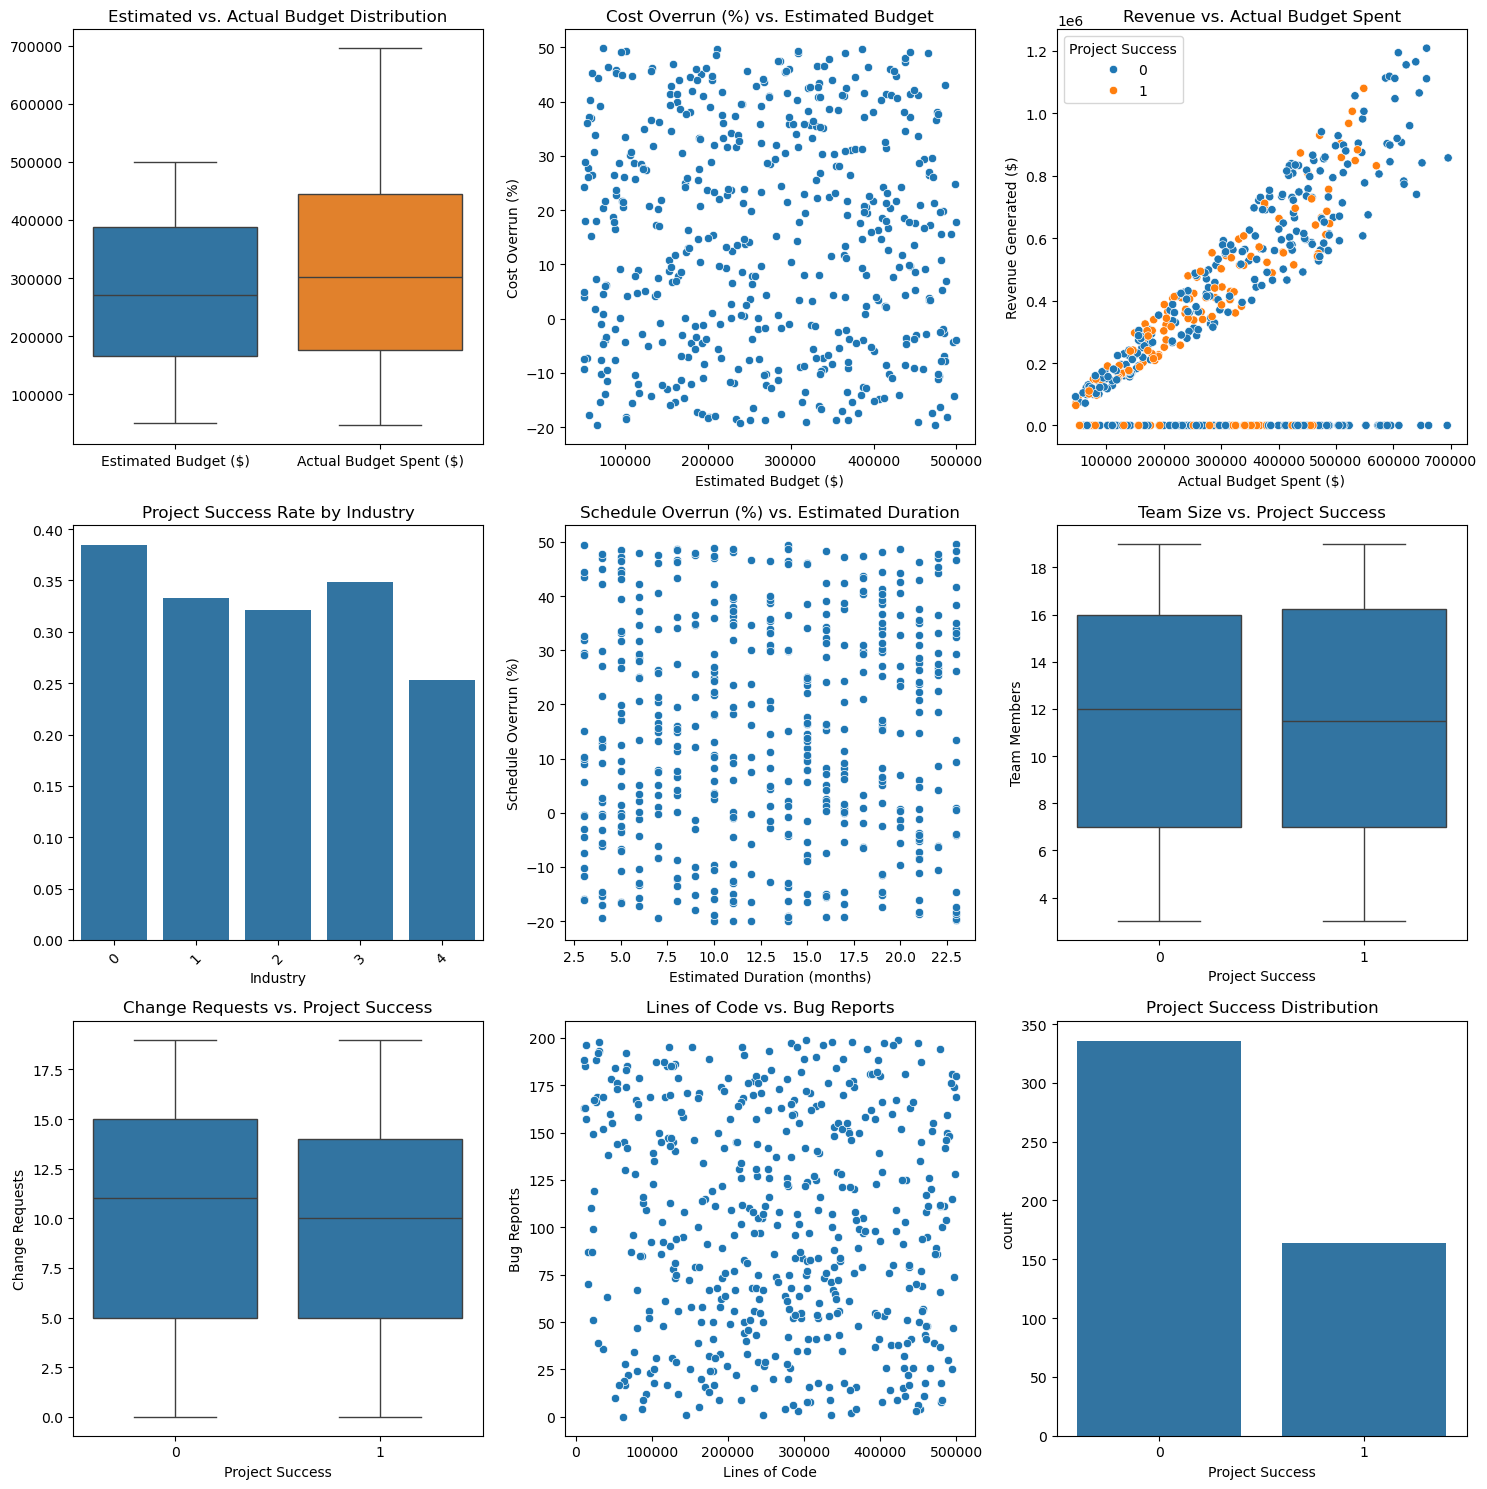

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  

sns.boxplot(data=dataset[['Estimated Budget ($)', 'Actual Budget Spent ($)']], ax=axes[0, 0])
axes[0, 0].set_title("Estimated vs. Actual Budget Distribution")

sns.scatterplot(x=dataset['Estimated Budget ($)'], y=dataset['Cost Overrun (%)'], ax=axes[0, 1])
axes[0, 1].set_title("Cost Overrun (%) vs. Estimated Budget")

sns.scatterplot(x=dataset['Actual Budget Spent ($)'], y=dataset['Revenue Generated ($)'], hue=dataset['Project Success'], ax=axes[0, 2])
axes[0, 2].set_title("Revenue vs. Actual Budget Spent")

industry_success = dataset.groupby('Industry')['Project Success'].mean().sort_values()
sns.barplot(x=industry_success.index, y=industry_success.values, ax=axes[1, 0])
axes[1, 0].set_title("Project Success Rate by Industry")
axes[1, 0].tick_params(axis='x', rotation=45)

sns.scatterplot(x=dataset['Estimated Duration (months)'], y=dataset['Schedule Overrun (%)'], ax=axes[1, 1])
axes[1, 1].set_title("Schedule Overrun (%) vs. Estimated Duration")

sns.boxplot(x=dataset['Project Success'], y=dataset['Team Members'], ax=axes[1, 2])
axes[1, 2].set_title("Team Size vs. Project Success")

sns.boxplot(x=dataset['Project Success'], y=dataset['Change Requests'], ax=axes[2, 0])
axes[2, 0].set_title("Change Requests vs. Project Success")

sns.scatterplot(x=dataset['Lines of Code'], y=dataset['Bug Reports'], ax=axes[2, 1])
axes[2, 1].set_title("Lines of Code vs. Bug Reports")

sns.countplot(x=dataset['Project Success'], ax=axes[2, 2])
axes[2, 2].set_title("Project Success Distribution")

plt.tight_layout()  
plt.show()


#### SOME BASIC ANALYSIS
1. **actual budegts are higher than estimated budgets** , frequency cost overruns.
2. **no clear pattern between cost overrun and estimated budget** , some projects exceed their budgets while some of them are under budget.
3. **investing/spending more leads to hgiher revenue.** but some projects even fail after investing huge amount of money.
4. **E-com** industry has higher success rate while **healthcare** industry has lower success rate.
5. **no clear pattern between schedule overrun and estimated duration**. some finish earlier than expected while some are ahead of schedule.
6. **team size doesn't affect project success.** since both successful and unsuccessful projects have same team sizes.
7. **change requests doesn't guarantee sucess or failure**.both successful and unsuccessful projects have similar num of change requests.
8. **more LOC doesn't mean more bugs.** some projects with fewer LOC have more bugs.
9. in our dataset , the **failure rate is more than the success rate.**

# CHECKING CORRELATION

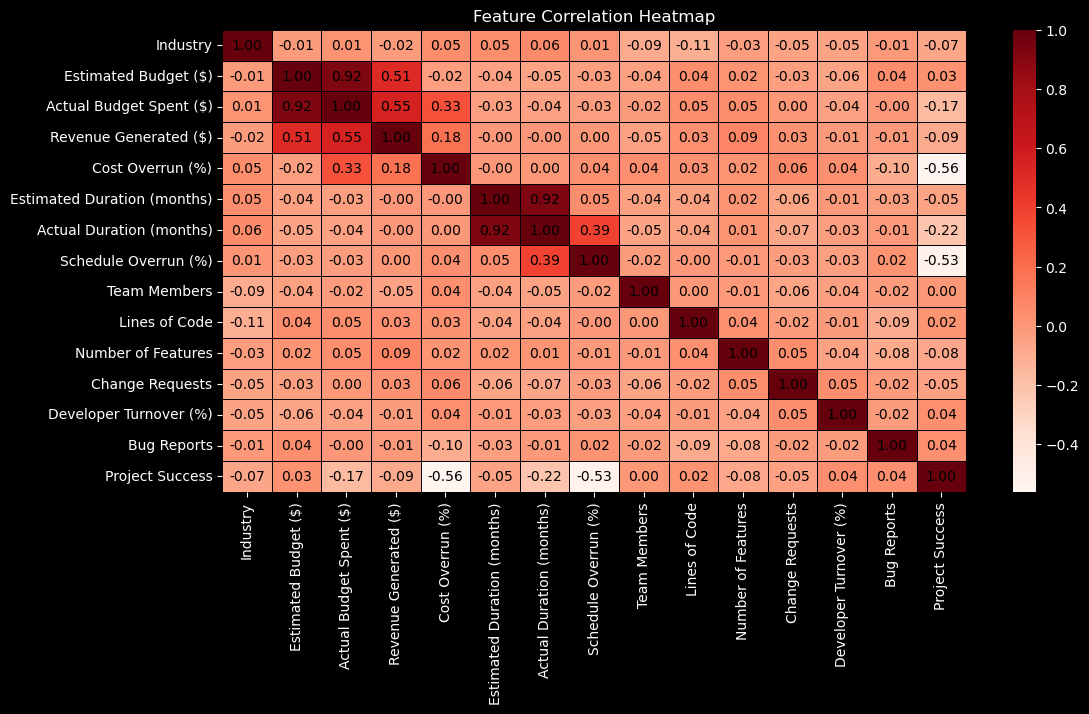

In [9]:
dataset = dataset.drop(columns=['Project ID'])
correlation_matrix = dataset.corr()
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5, 
            cmap="Reds", 
            annot_kws={"color": "black"}, 
            linecolor="black") 
plt.title("Feature Correlation Heatmap", color="white")
plt.show()


### analysis 
- estimated budget and actual budget spent have very high correlation(0.92) 
- cost overrun and project success have a negative correlation(-0.56) i.e higher cost overrruns means project failure 
- schedule overrun and project success also have a negative correlation(-0.53) which means that delays in projects can cause failures.
- other features (like Team Members, Change Requests, Lines of Code) have very low or no correlation with success means they’re not strong predictors on their own

In [10]:
dataset2 = dataset.copy()
dataset2.columns
display(dataset2)

,Industry,Estimated Budget ($),Actual Budget Spent ($),Revenue Generated ($),Cost Overrun (%),Estimated Duration (months),Actual Duration (months),Schedule Overrun (%),Team Members,Lines of Code,Number of Features,Change Requests,Developer Turnover (%),Bug Reports,Project Success
0,3,64397,86204.73,141860.88,33.86,5,4.18,-16.48,14,392891,21,10,33.74,37,0
1,1,484771,451288.17,807051.64,-6.91,15,12.77,-14.90,5,357247,42,6,11.95,151,1
2,0,228031,234091.03,0.00,2.66,17,18.39,8.20,17,220747,21,14,37.90,50,1
3,1,443944,487364.17,756540.01,9.78,20,20.13,0.67,4,187597,18,10,38.00,9,1
4,1,493733,570423.20,832131.49,15.53,21,20.22,-3.73,4,179302,49,15,15.63,119,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2,60954,88530.79,121601.62,45.24,19,16.22,-14.61,8,130592,12,4,23.74,81,0
496,0,391383,341190.80,0.00,-12.82,4,3.41,-14.71,12,244000,5,9,16.82,171,1
497,2,294761,429189.68,834548.33,45.61,12,17.59,46.60,10,265989,24,12,46.03,71,0
498,2,358658,459627.40,865976.65,28.15,18,18.15,0.81,16,332137,48,3,0.60,53,0


# Feature Selection using PEARSON CORELATION

In [11]:
correlation = dataset2.corr()
correlation_target = abs(correlation['Project Success'])
selected_features = correlation_target[correlation_target > 0.1].index.tolist()
selected_features.remove('Project Success')
print("Features Selected = ",selected_features)
X = dataset2[selected_features]
y = dataset2['Project Success']

Features Selected =  ['Actual Budget Spent ($)', 'Cost Overrun (%)', 'Actual Duration (months)', 'Schedule Overrun (%)']


# model training 

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naïve Bayes': GaussianNB(),
}


hyperparameters = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7]},
}


best_models = {}
for model_name, model in models.items():
    params = hyperparameters.get(model_name, {})
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_


results = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[model_name] = acc

    print(f"\n==================== {model_name} ====================")
    print(f"Accuracy: {acc:.2%}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))




==================== Logistic Regression ====================
Accuracy: 91.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        71
           1       1.00      0.69      0.82        29

    accuracy                           0.91       100
   macro avg       0.94      0.84      0.88       100
weighted avg       0.92      0.91      0.90       100


==================== SVM ====================
Accuracy: 97.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.96      0.93      0.95        29

    accuracy                           0.97       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.97      0.97      0.97       100


==================== KNN ====================
Accuracy: 94.00%
Classification Report:
              precision    recall  f1-score   support

           0  

### analysis 
1. logistic regression
   - **precision** : out of all predicted success was successful.
   - **recall** : 69% recall is lower means that model miss about 31% of actual successful projects.
   - **f1 score**: the model struggles more while identifying the sucessful projects
   - **support** : there are 71 failures and 29 success cases in data.
  
2. SVM
   - **precision** : 96% of successful projects were actually successful.
   - **recall** : model correctly identifies 93% of successful projects , missing 7%.
   - **f1 score**: good balance of precision and recall.
  
3. KNN
   - **precision** : 96% of successful projects were actually successful
   - **recall** : model correctly identifies 83% of successful projects , missing 17%.
   - **f1 score**: good balance
     
3. Naive Bayes 
   - **precision** : all of predicted successful projects were actually successful
   - **recall** : model correctly identifies 83% of successful projects , missing 17%.
   - **f1 score**: good balance

**RESULT**
*SVM IS A TOP PERFORMER*

# PREDICTIONS

In [13]:
import numpy as np
from sklearn.metrics import classification_report

def predict_with_trained_models(best_models, scaler, results):
    print("Enter project details:")
    
    features = [
        'Actual Budget Spent ($)',
        'Cost Overrun (%)', 
        'Actual Duration (months)',
        'Schedule Overrun (%)'
    ]
    inputs = {f: float(input(f"{f}: ")) for f in features}
    
    revenue = float(input("Revenue Generated ($): "))
    estimated_duration = float(input("Estimated Duration (months): "))
    loc = float(input("Lines of Code: "))
    
    # Scale input features
    input_scaled = scaler.transform(np.array([
        inputs['Actual Budget Spent ($)'],
        inputs['Cost Overrun (%)'],
        inputs['Actual Duration (months)'],
        inputs['Schedule Overrun (%)']
    ]).reshape(1, -1))
    
    # Predict with trained models
    predictions = {}
    for name, model in best_models.items():
        pred = model.predict(input_scaled)[0]
        predictions[name] = {
            'prediction': "Success" if pred == 1 else "Failure",
            'accuracy': results[name]  
        }
    
    # Financial Analysis
    profit = revenue - inputs['Actual Budget Spent ($)']
    profitability = (profit / inputs['Actual Budget Spent ($)']) * 100
    cost_overrun = inputs['Cost Overrun (%)']
    schedule_overrun = inputs['Schedule Overrun (%)']
    
    print("\n=== Financial Analysis ===")
    print(f"Profit: ${profit:,.2f}")
    print(f"Profitability: {profitability:.2f}%")
    print(f"Cost Overrun: {cost_overrun:.2f}%") 
    print(f"Schedule Overrun: {schedule_overrun:.2f}%")
    
    # COCOMO Estimation
    kloc = loc / 1000
    
    # Select mode based on KLOC
    if kloc <= 50:
        mode = 'Organic'
        a, b, c, d = 2.4, 1.05, 2.5, 0.38
    elif kloc <= 300:
        mode = 'Semi-detached'
        a, b, c, d = 3.0, 1.12, 2.5, 0.35
    else:
        mode = 'Embedded'
        a, b, c, d = 3.6, 1.20, 2.5, 0.32
    
    effort = a * (kloc ** b)
    duration = c * (effort ** d)
    cocomo_pred = "Success" if duration <= estimated_duration * 1.15 else "Failure"
    
    print("\n=== COCOMO Estimation ===")
    print(f"COCOMO Mode: {mode} (because KLOC = {kloc:.2f})")
    print(f"Estimated Effort: {effort:.1f} person-months")
    print(f"Estimated Duration: {duration:.1f} months")
    print(f"Prediction: {cocomo_pred}")
    
    # ML Predictions
    print("\n=== ML Predictions ===")
    for name, pred in predictions.items():
        print(f"{name}: {pred['prediction']} (Accuracy: {pred['accuracy']:.1%})")
    
    success_score = sum(
        pred['accuracy'] for pred in predictions.values() 
        if pred['prediction'] == "Success"
    )
    total_score = sum(pred['accuracy'] for pred in predictions.values())
    ml_final = "Success" if (success_score / total_score) > 0.5 else "Failure"
    
    print("\n=== Final Decision ===")
    print(f"ML Consensus: {ml_final}")
    print(f"COCOMO: {cocomo_pred}")
    
    if ml_final != cocomo_pred:
        print("\nAnalysis of Disagreement:")
        if profitability > 50 and cost_overrun < 10:
            print("- High profitability suggests ML may be correct")
        elif abs(duration - estimated_duration) > estimated_duration * 0.25:
            print("- Large schedule deviation suggests COCOMO may be correct")
        else:
            print("- No clear evidence; project performance is moderate, so no side is strongly supported")


if __name__ == "__main__":
    while True:
        predict_with_trained_models(best_models, scaler, results)
        if input("\nPredict another? (y/n): ").lower() != 'y':
            break


Enter project details:


Actual Budget Spent ($):  500000
Cost Overrun (%):  12
Actual Duration (months):  21
Schedule Overrun (%):  6
Revenue Generated ($):  650000
Estimated Duration (months):  5
Lines of Code:  125000


C:\Users\rahim\New folder\anaconda31\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



=== Financial Analysis ===
Profit: $150,000.00
Profitability: 30.00%
Cost Overrun: 12.00%
Schedule Overrun: 6.00%

=== COCOMO Estimation ===
COCOMO Mode: Semi-detached (because KLOC = 125.00)
Estimated Effort: 669.4 person-months
Estimated Duration: 24.4 months
Prediction: Failure

=== ML Predictions ===
Logistic Regression: Failure (Accuracy: 91.0%)
SVM: Success (Accuracy: 97.0%)
KNN: Success (Accuracy: 94.0%)
Naïve Bayes: Failure (Accuracy: 95.0%)

=== Final Decision ===
ML Consensus: Success
COCOMO: Failure

Analysis of Disagreement:
- Large schedule deviation suggests COCOMO may be correct



Predict another? (y/n):  n


# INTEGRATING GUI

In [3]:
import tkinter as tk
from tkinter import messagebox, scrolledtext
from tkinter import font
import numpy as np
import pandas as pd
import os


label_font = ("Helvetica", 14)
entry_font = ("Helvetica", 14)
monospace_font = ("Courier New", 12)
BG_COLOR = "black"
FG_COLOR = "white"
def validate_inputs(actual_budget, actual_duration, revenue, estimated_duration, loc):
    if actual_budget < 0:
        messagebox.showerror("Invalid Input", "Actual Budget cannot be negative.")
        return False
    if actual_duration < 0:
        messagebox.showerror("Invalid Input", "Actual Duration cannot be negative.")
        return False
    if revenue < 0:
        messagebox.showerror("Invalid Input", "Revenue cannot be negative.")
        return False
    if estimated_duration < 0:
        messagebox.showerror("Invalid Input", "Estimated Duration cannot be negative.")
        return False
    if loc < 0:
        messagebox.showerror("Invalid Input", "Lines of Code (LOC) cannot be negative.")
        return False
    return True

analysis_count = 1  # Counter for new analyses

def predict_with_trained_models(best_models, scaler, results):
    global analysis_count
    try:
        actual_budget = float(entry_actual_budget.get())
        cost_overrun = float(entry_cost_overrun.get())
        actual_duration = float(entry_actual_duration.get())
        schedule_overrun = float(entry_schedule_overrun.get())
        revenue = float(entry_revenue.get())
        estimated_duration = float(entry_estimated_duration.get())
        loc = float(entry_loc.get())
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numerical values for all fields.")
        return
    if not validate_inputs(actual_budget, actual_duration, revenue, estimated_duration, loc):
        return


    output_text.insert(tk.END, f"\nA N A L Y S I S  {analysis_count}", "analysis_tag")
    output_text.yview(tk.END)
    analysis_count += 1

    input_scaled = scaler.transform(np.array([
        actual_budget,
        cost_overrun,
        actual_duration,
        schedule_overrun
    ]).reshape(1, -1))

    predictions = {}
    for name, model in best_models.items():
        pred = model.predict(input_scaled)[0]
        predictions[name] = {
            'prediction': "Success" if pred == 1 else "Failure",
            'accuracy': results[name]
        }

    profit = revenue - actual_budget
    profitability = (profit / actual_budget) * 100

    kloc = loc / 1000
    if kloc <= 50:
        mode = 'Organic'
        a, b, c, d = 2.4, 1.05, 2.5, 0.38
    elif kloc <= 300:
        mode = 'Semi-detached'
        a, b, c, d = 3.0, 1.12, 2.5, 0.35
    else:
        mode = 'Embedded'
        a, b, c, d = 3.6, 1.20, 2.5, 0.32

    effort = a * (kloc ** b)
    duration = c * (effort ** d)
    cocomo_pred = "Success" if duration <= estimated_duration * 1.15 else "Failure"

    # Financial Analysis
    output_text.insert(tk.END, "\nFinancial Analysis", "green_heading")
    result_text = (
        f"\n{'Profit:'.ljust(25)} ${profit:,.2f}"
        f"\n{'Profitability:'.ljust(25)} {profitability:.2f}%"
        f"\n{'Cost Overrun:'.ljust(25)} {cost_overrun:.2f}%"
        f"\n{'Schedule Overrun:'.ljust(25)} {schedule_overrun:.2f}%"
    )
    output_text.insert(tk.END, result_text)

    # COCOMO Estimation
    output_text.insert(tk.END, "\nCOCOMO Estimation", "green_heading")
    result_text = (
        f"\n{'COCOMO Mode:'.ljust(25)} {mode} (KLOC = {kloc:.2f})"
        f"\n{'Effort:'.ljust(25)} {effort:.1f} person-months"
        f"\n{'Duration:'.ljust(25)} {duration:.1f} months"
        f"\n{'Prediction:'.ljust(25)} {cocomo_pred}"
    )
    output_text.insert(tk.END, result_text)

    # ML Model Predictions
    output_text.insert(tk.END, "\nML Model Predictions", "green_heading")
    for name, pred in predictions.items():
        result_text = (
            f"\n{name.ljust(30)} {pred['prediction'].ljust(10)} "
            f"(Accuracy: {pred['accuracy']:.1%})"
        )
        output_text.insert(tk.END, result_text)

    # Final Decision
    success_score = sum(pred['accuracy'] for pred in predictions.values() if pred['prediction'] == "Success")
    total_score = sum(pred['accuracy'] for pred in predictions.values())
    ml_final = "Success" if (success_score / total_score) > 0.5 else "Failure"

    output_text.insert(tk.END, "\nDecision", "blue_heading")
    result_text = (
        f"\n{'ML Consensus:'.ljust(25)} {ml_final}"
        f"\n{'COCOMO:'.ljust(25)} {cocomo_pred}"
    )
    output_text.insert(tk.END, result_text)

    # Disagreement Analysis
    if ml_final != cocomo_pred:
        output_text.insert(tk.END, "\nDisagreement Analysis", "red_heading")
        explanation = ""
        if profitability > 50 and cost_overrun < 10:
            explanation = "- High profitability suggests ML may be correct."
        elif abs(duration - estimated_duration) > estimated_duration * 0.25:
            explanation = "- Large schedule deviation suggests COCOMO may be correct."
        else:
            explanation = "- No clear signal; both have valid points depending on interpretation."
        output_text.insert(tk.END, f"\n{explanation}")

    # Save result to Excel
    save_to_excel(
        input_data=[
            actual_budget,
            cost_overrun,
            actual_duration,
            schedule_overrun,
            revenue,
            estimated_duration,
            loc
        ],
        cocomo_mode=mode,
        effort=effort,
        duration=duration,
        cocomo_pred=cocomo_pred,
        ml_predictions=predictions,
        final_decision=ml_final
    )

def clear_inputs():
    entry_actual_budget.delete(0, tk.END)
    entry_cost_overrun.delete(0, tk.END)
    entry_actual_duration.delete(0, tk.END)
    entry_schedule_overrun.delete(0, tk.END)
    entry_revenue.delete(0, tk.END)
    entry_estimated_duration.delete(0, tk.END)
    entry_loc.delete(0, tk.END)

def on_enter_pressed(event, next_widget):
    next_widget.focus()

def on_last_entry_enter(event):
    process_button.invoke()

def save_to_excel(input_data, cocomo_mode, effort, duration, cocomo_pred, ml_predictions, final_decision):
    filename = "project_success_analysis.xlsx"
    actual_budget, cost_overrun, actual_duration, schedule_overrun, revenue, estimated_duration, loc = input_data
    profit = revenue - actual_budget
    profitability = (profit / actual_budget) * 100

    disagreement_notes = ""
    if final_decision != cocomo_pred:
        if profitability > 50 and cost_overrun < 10:
            disagreement_notes = "High profitability suggests ML may be correct."
        elif abs(duration - estimated_duration) > estimated_duration * 0.25:
            disagreement_notes = "Large schedule deviation suggests COCOMO may be correct."
        else:
            disagreement_notes = "No clear signal; both have valid points depending on interpretation."
    else:
        disagreement_notes = final_decision.upper()

    new_row = {
        "Actual Budget": actual_budget,
        "Cost Overrun (%)": cost_overrun,
        "Actual Duration (months)": actual_duration,
        "Schedule Overrun (%)": schedule_overrun,
        "Revenue": revenue,
        "Profit": profit,
        "Profitability (%)": profitability,
        "Estimated Duration": estimated_duration,
        "Lines of Code": loc,
        "COCOMO Mode": cocomo_mode,
        "COCOMO Effort (PM)": effort,
        "COCOMO Duration (months)": duration,
        "COCOMO Prediction": cocomo_pred,
        "ML Consensus": final_decision,
        "Disagreement Notes": disagreement_notes
    }

    for model, info in ml_predictions.items():
        new_row[f"{model} Prediction"] = info['prediction']
        new_row[f"{model} Accuracy"] = info['accuracy']

    df_new = pd.DataFrame([new_row])

    if os.path.exists(filename):
        df_existing = pd.read_excel(filename)
        df_combined = pd.concat([df_existing, df_new], ignore_index=True)
    else:
        df_combined = df_new

    df_combined.to_excel(filename, index=False)

def clear_output():
    output_text.delete('1.0', tk.END)

def create_labeled_entry(frame, text, row, entry_var, next_widget=None):
    tk.Label(frame, text=text, font=label_font, bg=BG_COLOR, fg=FG_COLOR).grid(row=row, column=0, sticky="e", padx=20, pady=20)
    entry = tk.Entry(frame, textvariable=entry_var, font=entry_font, width=20, bd=0, relief="flat", bg=BG_COLOR, fg=FG_COLOR, insertbackground=FG_COLOR, highlightbackground="white", highlightcolor="white", highlightthickness=0.5)
    entry.grid(row=row, column=1, padx=10, pady=5)
    if next_widget:
        entry.bind("<Return>", lambda event: on_enter_pressed(event, next_widget))
    return entry

root = tk.Tk()
root.title("Project Success Prediction")
root.attributes('-fullscreen', True)
root.configure(bg=BG_COLOR)

heading_label = tk.Label(root, text="SOFTWARE PROJECT SUCCESS PREDICTOR", font=("Times New Roman", 40, "bold"), bg=BG_COLOR, fg="white")
heading_label.grid(row=0, column=0, columnspan=3, pady=20)

canvas = tk.Canvas(root, bd=0, relief="flat", bg=BG_COLOR, highlightthickness=0,width=20,height=10)
canvas.grid(row=1, column=0, sticky="nsew", padx=20, pady=10)
canvas.bind('<Configure>', lambda e: canvas.configure(scrollregion=canvas.bbox("all")))

form_frame = tk.Frame(canvas, bg=BG_COLOR)
canvas.create_window((0, 0), window=form_frame, anchor='nw')

entry_vars = [tk.StringVar() for _ in range(7)]
entries = []
labels = [
    "Actual Budget Spent ($):",
    "Cost Overrun (%):",
    "Actual Duration (months):",
    "Schedule Overrun (%):",
    "Revenue Generated ($):",
    "Estimated Duration (months):",
    "Lines of Code:"
]

for i, label in enumerate(labels):
    entry = create_labeled_entry(form_frame, label, i, entry_vars[i])
    entries.append(entry)

for i in range(len(entries) - 1):
    entries[i].bind("<Return>", lambda event, next=entries[i+1]: on_enter_pressed(event, next))
entries[-1].bind("<Return>", on_last_entry_enter)

(entry_actual_budget, entry_cost_overrun, entry_actual_duration,
 entry_schedule_overrun, entry_revenue, entry_estimated_duration,
 entry_loc) = entries

process_button = tk.Button(form_frame, text="Predict", font=label_font, command=lambda: predict_with_trained_models(best_models, scaler, results), width=50, bg="blue", fg="white")
process_button.grid(row=len(labels), column=0, columnspan=2, padx=20, pady=20)

new_button = tk.Button(form_frame, text="New Prediction", font=label_font, command=clear_inputs, width=50, bg="#003300", fg="white")
new_button.grid(row=len(labels)+1, column=0, columnspan=2, padx=20, pady=20)

clear_output_button = tk.Button(form_frame, text="Clear Output", font=label_font, command=clear_output, width=50, bg="#8B0000", fg="white")
clear_output_button.grid(row=len(labels)+2, column=0, columnspan=2, padx=20, pady=20)

output_text = scrolledtext.ScrolledText(
    root,font=("Calibri",15),width=70,height=30,bd=0,relief="flat",bg="black",fg=FG_COLOR,insertbackground=FG_COLOR,highlightbackground=BG_COLOR,highlightcolor=BG_COLOR,highlightthickness=0,borderwidth=0,
)
output_text.grid(row=1, column=1, sticky="nsew", padx=10, pady=10)
output_text.tag_configure("analysis_tag", foreground="yellow", justify="center", font=("Times New Roman", 30, "bold"))
output_text.tag_configure("blue_heading", foreground="blue", justify="left", font=("calibri", 20,"italic"))
output_text.tag_configure("red_heading", foreground="red", justify="center", font=("calibri", 20, "italic"))
output_text.tag_configure("green_heading", foreground="blue", justify="left", font=("calibri", 20,"italic"))

root.grid_columnconfigure(0, weight=4)
root.grid_columnconfigure(1, weight=1)
root.grid_rowconfigure(1, weight=1)

root.mainloop()
